# Example 3: Use of surface model Dubois95 and canopy model SSRT

## 1. Requirements

- Installation of SenSE

## 2. Dubois95+SSRT for different incidence angles

First of all, we need to import several packages

In [1]:
import numpy as np
from sense.surface import Dubois95
from sense.util import f2lam
from sense.model import RTModel
from sense.soil import Soil
from sense.canopy import OneLayer
import matplotlib.pyplot as plt

Further, we need to define surface model input parameters

In [2]:
# array with different incidence angles in radians
theta_deg = np.arange(0.,70.)
theta = np.deg2rad(theta_deg) # incidence angle [radians]

# soil model parameters
f  = 13.  # frequency [GHz]
lam = f2lam(f)  # wavelength [m]
s = 0.15/100.  # surface roughness [m]
eps = 15. - 4.0j # dielectric constant

Definition of canopy model parameters for the case of short alfalfa

In [3]:
# canopy parameters for short alfalfa
d = 0.17 # vegetation height [m]
tau = 2.5 # optical depths
ke = tau/d # extinction coefficient [m⁻¹]
omega = 0.27 # scattering albedo
ks=omega*ke

Initialize and run the model combination Dubois95 and SSRT (rayleigh scattering)

In [4]:
# Define models and polarization to be used
models = {'surface' : 'Dubois95', 'canopy' : 'turbid_rayleigh'}
pol='vv'

# Soil model initialization
S = Soil(f=f, s=s, eps=eps)
# Canopy model initialization
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
# Combined Model initialization
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
# Run RT model
RT.sigma0()
back_short = RT.stot[pol]

/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:44: RuntimeWarning: divide by zero encountered in divide
  b = 10.**(-2.35)*((np.cos(self.theta)**3.) / (np.sin(self.theta)**3.))
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:48: RuntimeWarning: invalid value encountered in multiply
  return b*c*d
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:36: RuntimeWarning: divide by zero encountered in divide
  a = (10.**-2.75)*(np.cos(self.theta)**1.5)/(np.sin(self.theta)**5.)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:40: RuntimeWarning: invalid value encountered in multiply
  return a*c*d


Definition of canopy model parameters for the case of tall alfalfa and run the model again

In [5]:
# canopy parameters for tall alfalfa
d = 0.55 # vegetation height [m]
tau = 0.45 # optical depths
ke = tau/d # extinction coefficient [m⁻¹]
omega = 0.175 # scattering albedo
ks=omega*ke

# initialize and run of the model combination
S = Soil(f=f, s=s, eps=eps)
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
RT.sigma0()

Visualization

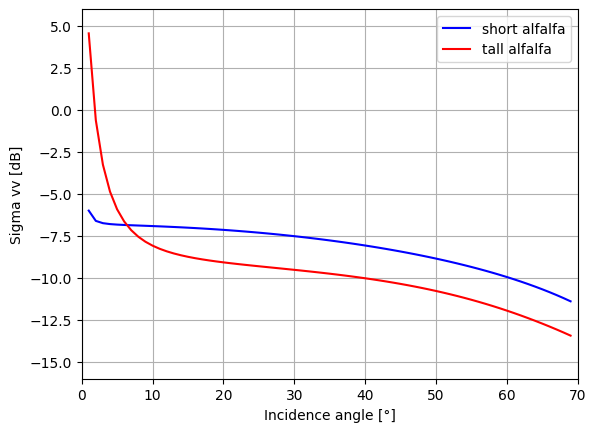

In [6]:
# plot backscatter changes for short and high alfalfa based on the incidence angle
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_deg, 10.*np.log10(back_short), label='short alfalfa', color='b')
ax.plot(theta_deg, 10.*np.log10(RT.stot[pol]), label='tall alfalfa', color='r')

ax.legend()

ax.grid()
ax.set_xlabel('Incidence angle [°]')
ax.set_ylabel('Sigma vv [dB]')
ax.set_xlim(0.,70.)
ax.set_ylim(-16.,6.)

plt.show()